# Reconnaissance faciale via $k$ plus proches voisins ($k$-NN)

>## Partie 1: Dataset

## Librairies

- La librairie `cv2` permet la détection automatique de visages, entre autres.

- La librairie `pickle` permet de sauvegarder vos modèles une fois entraînés, et de les recharger pour pouvoir les utiliser.

In [3]:
import os

import cv2
import pickle

import numpy as np

import matplotlib.pyplot as plt

## Création du dataset

Le code suivant permet de créer un **dataset** d'images que vous utiliserez dans votre projet de **reconnaissance faciale**. Ce dataset contiendra des images de vous-même associées à votre nom ainsi que des images d'autres personnes (par exemple vos camarades) associées à leurs noms. **À chaque fois que vos relancez le code ci-dessous, votre caméra capture 10 images de la personne qui se trouve devant vootre PC et ajoute ces dernières à votre dataset.** 

Le code effectue les opérations suivantes. Premièrement, on lit le flux vidéo de votre caméra et on détecte automatiquement les visages dans chaque image de ce flux en utilisant le **classificateur en cascade de Haar (Haar cascade classifier)** de la librairie `OpenCV`. 

Plus précisément, tant que la variable `ret` est vraie, indiquant que le flux vidéo est lu correctement, pour chaque image capturée par la caméras, on effectue les opérations suivantes:
1. on convertit l'image en niveaux de gris;
2. on détecte les coordonnées du visage en utilisant le classificateur en cascade de Haar;
3. on recadre la région du visage et la redimensionne en $50 \times 50$ pixels;
4. on ajoute l'image du visage redimensionné à la liste `donnees_visage`, à chaque intervalle de $10$ images.

Une fois que $10$ images de votre visage ont été collecteés, ou si l'utilisateur appuye sur la touche `Esc`, on met fin à la boucle et enregistre les images dans la liste `donnees_visage` sous forme d'un tableau `NumPy`.

Par la suite, l'existence des fichiers `noms.pkl` et `visages.pkl` est vérifiée. S'ils n'existent pas, de nouveaux fichiers sont créés, la variable `nom` est enregistrée dans `noms.pkl` et les données de visage sont enregistrées dans `visages.pkl`. Si ces fichiers existent déjà, le code charge les données existantes, ajoute les nouvelles données de visage et noms, et les réenregistre le tout dans ces fichiers.

In [15]:
# ================== #
# Variables globales #
# ================== #
if not os.path.exists("data"):
    os.mkdir("data")         # création d'un répertoire data

nb_images_collectees = 10    # nombre d'image que vous voulez collecter

donnees_visage = []

camera = cv2.VideoCapture(0) # 0 pour 'built-in' caméra, 1 pour caméra externe

cascade_visage = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Assurez-vous que le classificateur de cascade des yeux est chargé correctement
if cascade_visage.empty():
    print("Erreur: Le classificateur de cascade n'a pas été chargé correctement.")
else:
    print("Le classificateur de cascade a été chargé avec succès.")


# =============================== #
# Capture des data: nom et images #
# =============================== #
nom = input("Entrez votre nom: ")

ret = True
i = 0

while(ret):
    
    ret, frame = camera.read()
    
    if ret == True:
        
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        coordonnees_visage = cascade_visage.detectMultiScale(gris, 1.3, 4)

        for (a, b, w, h) in coordonnees_visage:
            
            visages = frame[b:b+h, a:a+w, :]
            visages_redimensionnes = cv2.resize(visages, (50, 50))
            
            if i % 10 == 0 and len(donnees_visage) < nb_images_collectees:
                
                donnees_visage.append(visages_redimensionnes)
                
            cv2.rectangle(frame, (a, b), (a+w, b+h), (255, 0, 0), 2)
            
        i += 1

        cv2.imshow('Visages', frame)

        if cv2.waitKey(1) == 27 or len(donnees_visage) >= nb_images_collectees:
            
            break
    else:
        
        print('erreur')
        break
    

cv2.destroyAllWindows()
camera.release()

donnees_visage = np.asarray(donnees_visage)
# donnees_visage = donnees_visage.reshape(10, -1)


# ====================================== #
# Enregistrement des data: nom et images #
# ====================================== #
if 'noms.pkl' not in os.listdir('data/'):
    
    noms = [nom]*10
    with open('data/noms.pkl', 'wb') as file:
        pickle.dump(noms, file)
else:
    
    with open('data/noms.pkl', 'rb') as file:
        noms = pickle.load(file)

    noms = noms + [nom]*10
    with open('data/noms.pkl', 'wb') as file:
        pickle.dump(noms, file)


if 'visages.pkl' not in os.listdir('data/'):
    
    with open('data/visages.pkl', 'wb') as w:
        pickle.dump(donnees_visage, w)
else:
    
    with open('data/visages.pkl', 'rb') as w:
        visages = pickle.load(w)

    visages = np.append(visages, donnees_visage, axis=0)
    with open('data/visages.pkl', 'wb') as w:
        pickle.dump(visages, w)

Le classificateur de cascade a été chargé avec succès.


## Visualisation du dataset

Le instructions suivantes permettent de loader votre dataset et de comprendre comment sont stockées les data.

Prêtez attention aux types de vos data, en particulier à la dimension de vos images, etc.

In [5]:
with open("data/noms.pkl", "rb") as fh:
    noms = pickle.load(fh)

In [6]:
noms

['Raphael',
 'Raphael',
 'Raphael',
 'Raphael',
 'Raphael',
 'Raphael',
 'Raphael',
 'Raphael',
 'Raphael',
 'Raphael']

In [7]:
with open("data/visages.pkl", "rb") as fh:
    visages = pickle.load(fh)

In [8]:
visages

array([[[[255, 254, 255],
         [255, 254, 255],
         [255, 253, 255],
         ...,
         [255, 254, 255],
         [255, 254, 255],
         [255, 254, 255]],

        [[255, 254, 255],
         [255, 254, 255],
         [255, 255, 255],
         ...,
         [255, 254, 255],
         [255, 254, 255],
         [255, 254, 255]],

        [[255, 254, 255],
         [255, 254, 255],
         [255, 255, 252],
         ...,
         [255, 254, 255],
         [255, 254, 255],
         [255, 254, 255]],

        ...,

        [[156, 195, 243],
         [152, 193, 235],
         [156, 194, 237],
         ...,
         [254, 254, 255],
         [255, 254, 255],
         [255, 254, 255]],

        [[157, 196, 251],
         [153, 192, 244],
         [152, 192, 240],
         ...,
         [255, 254, 254],
         [253, 252, 254],
         [255, 254, 255]],

        [[140, 189, 229],
         [134, 150, 202],
         [125, 167, 200],
         ...,
         [173, 165, 149],
        

In [9]:
visages.shape

(10, 50, 50, 3)

In [10]:
sample_1 = visages[0]
sample_1.shape

(50, 50, 3)

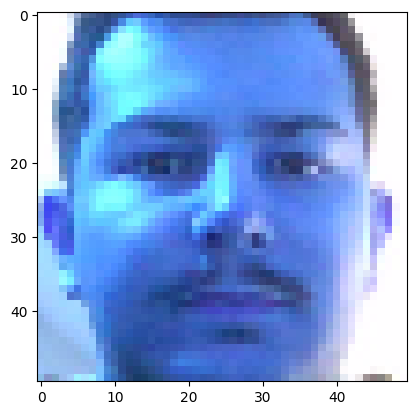

In [11]:
plt.imshow(sample_1, interpolation="nearest")

In [12]:
sample_2 = visages[5]
sample_2.shape

(50, 50, 3)

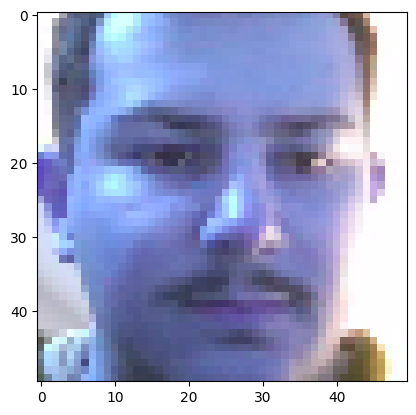

In [13]:
plt.imshow(sample_2, interpolation="nearest")

In [14]:
import cv2

# Chargement du classificateur de cascade pour la détection de visages
cascade_visage = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Charger une image à partir du disque
image = cv2.imread('moi.png')

# Convertir l'image en niveaux de gris
gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Détecter les visages dans l'image
coordonnees_visage = cascade_visage.detectMultiScale(gris, 1.3, 5)

# Dessiner des rectangles autour des visages détectés
for (x, y, w, h) in coordonnees_visage:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Afficher l'image avec les visages détectés
cv2.imshow('Visages détectés', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
